Importing data

In [2]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/notamyth/BAwithR/master/ps2/CEOSAL2.csv")

1) Find the average salary and the average tenure in the sample.

In [3]:
print("Avarage salary: %f"%df["salary"].mean())
print("Avarage tenure: %f"%df["ceoten"].mean())

Avarage salary: 865.864407
Avarage tenure: 7.954802


2) How many CEOs are in their first year as CEO (that is, ceoten = 0)? What is the longest tenure as a CEO?

In [6]:
print("Number of CEOs in therir first year as CEO: %d"% len(df[df["ceoten"]==0]))
print("Longest tenure as a CEO: %d"% max(df["ceoten"]))

Number of CEOs in therir first year as CEO: 5
Longest tenure as a CEO: 37


In [7]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import statsmodels.api as sm

3)Estimate the simple regression model, approximate predicted percentage increase in salary given one more year as a CEO.

In [8]:
X=sm.add_constant(df["ceoten"].to_numpy())
Y=np.log(df["salary"].to_numpy())
lin_regr=sm.OLS(Y,X)
lin_regr_est=lin_regr.fit()
lin_regr_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Fri, 15 Oct 2021   Prob (F-statistic):              0.128
Time:                        23:49:21   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5055      0.068     95.682      0.000       6.371       6.640
x1             0.0097      0.006      1.528      0.128      -0.003       0.022
==============================================================================
Omnibus:                        3.858   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.907
Skew:                          -0.189   Prob(JB):                        0.142
Kurtosis:                       3.622   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x1=10
x2=x1+1
y1=np.exp(lin_regr_est.predict([1,x1]))
y2=np.exp(lin_regr_est.predict([1,x2]))
p=(100*(y2-y1))/y1
print("Predicted percentage increase: %f"%p)

Predicted percentage increase: 0.977106


4)Plot the line of linear regression and scatter plot

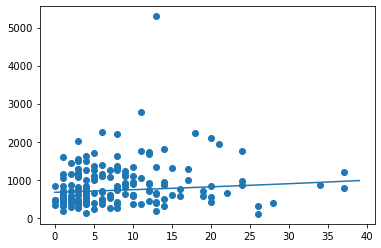

In [10]:
x=list(range(0,40))
X=df["ceoten"].to_numpy()
Y=df["salary"].to_numpy()
plt.plot(x, np.exp(lin_regr_est.predict([[1,xi] for xi in x])))
plt.scatter(X,Y)
plt.show()

5-6) Compare betta_1 and betta_0 with library model

In [11]:
def cov(X,Y):
    return sum((X-X.mean())*(Y-Y.mean()))/len(X)
def var(X):
    return (X**2).mean()-(X.mean())**2


In [12]:
betta1=cov(X,np.log(Y))/var(X)
betta0=(np.log(Y).mean())-(betta1*(X.mean()))
print("Model params:",lin_regr_est.params)
print("My params:   ", np.array([betta0,betta1]))


Model params: [6.50549798 0.00972363]
My params:    [6.50549798 0.00972363]


7-8) Compare standard error of intercept and slope with library model

In [13]:
Y=np.log(Y)
Y_hat=lin_regr_est.predict([[1,x] for x in X])
n=len(X)
ESS=sum((Y-Y_hat)**2)
s=np.sqrt(ESS/(n-2))
SE_b_0=s*np.sqrt(sum(X**2)/(n*sum(X**2)-sum(X)**2))


SE_b_1=s*np.sqrt(n/(n*sum(X**2)-sum(X)**2))
print("Model standart errors:",lin_regr_est.bse)
print("My standart errors:    ",round(SE_b_0,8),round(SE_b_1,8))

Model standart errors: [0.06799107 0.00636448]
My standart errors:     0.06799107 0.00636448


9) Compare standart R sqaure with library model

In [14]:
TSS=sum((Y-Y.mean())**2)
R_square=1-ESS/TSS
print("Model R squared:   ",lin_regr_est.rsquared)
print("My model R squared:",R_square)

Model R squared:    0.013162517743660396
My model R squared: 0.013162517743660174
